In [1]:
import pandas as pd
import seaborn as sns
from plotly import express as plt
import numpy as np

In [2]:
# reading laptop.csv Dataset 
df = pd.read_csv('./laptop.csv')

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
# Checking Rows and columns  
df.shape

(1303, 13)

In [5]:
# checking information and data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
# checking duplicate values --->
df.duplicated().sum()
df = df.drop_duplicates()
df.duplicated().sum()

0

### Data Preprocessing:

here Unnamed: 0.1 ,Unnamed: 0 columns are not used becuase of they both are similar to index numbers ---->

In [7]:
# Droping Unecessery columns ---> 
df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

In [8]:
df.shape

(1303, 11)

In [9]:
# checking null values ------>
df.isnull().sum()
# here all columns are having null values --->

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [10]:
# seperating catogorical columns ---> 
catogorical_var = df.select_dtypes(include='object')
catogorical_var.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg


In [11]:
# seperating numerical columns ---> 
numerical_var = df.select_dtypes(exclude='object')
numerical_var.head()

,Price
0,71378.6832
1,47895.5232
2,30636.0000
3,135195.3360
4,96095.8080


Handling missing values of numerical column ------>

In [12]:
numerical_var.columns

Index(['Price'], dtype='object')

<Axes: >

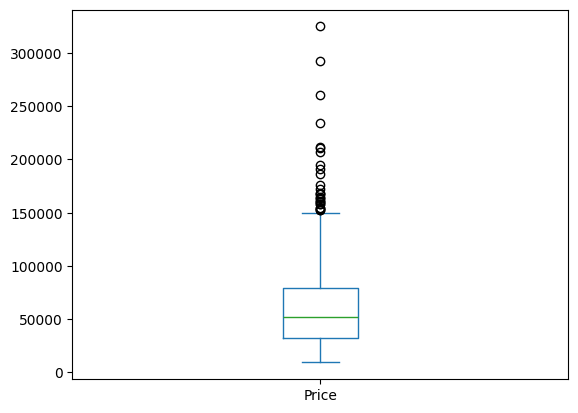

In [13]:
# in price column there are outliers so we are going to calculate median 
df['Price'].plot(kind='box')

In [14]:
df['Price'] = df['Price'].fillna(df['Price'].median())

Handling missing values of catogorical column ------>

In [15]:
catogorical_var.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [16]:
# filling missing values with mode for catogorical columns
df['Company']= df['Company'].fillna(df['Company'].mode()[0])
df['TypeName']= df['TypeName'].fillna(df['TypeName'].mode()[0])
df['Inches']= df['Inches'].fillna(df['Inches'].mode()[0])
df['ScreenResolution']= df['ScreenResolution'].fillna(df['ScreenResolution'].mode()[0])
df['Cpu']= df['Cpu'].fillna(df['Cpu'].mode()[0])
df['Ram']= df['Ram'].fillna(df['Ram'].mode()[0])
df['Memory']= df['Memory'].fillna(df['Memory'].mode()[0])
df['Gpu']= df['Gpu'].fillna(df['Gpu'].mode()[0])
df['OpSys']= df['OpSys'].fillna(df['OpSys'].mode()[0])
df['Weight']= df['Weight'].fillna(df['Weight'].mode()[0])

After filling null values for both catogorical column and numerical column hence there are no null values found ----> 

In [17]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

#### Detecting The Outliers ---->

In [18]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

<Axes: ylabel='Price'>

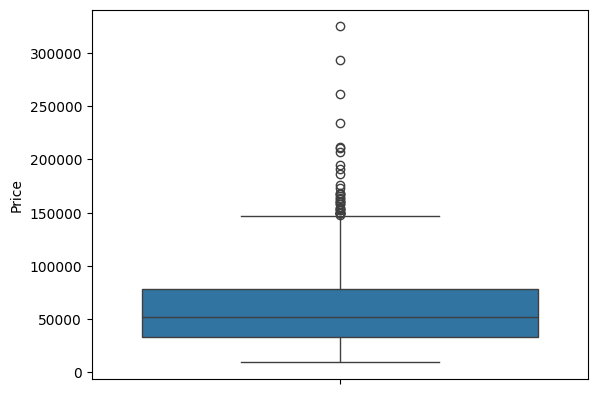

In [19]:
sns.boxplot(df['Price'])

<Axes: ylabel='Weight'>

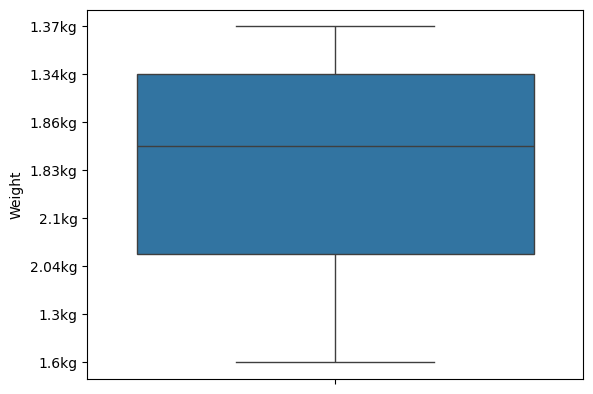

In [20]:
# # here we can see that theere are no outliers in Weight column --->
sns.boxplot(df['Weight'].head(10))

#### Treating The Outliers ---->

Calculating the IQR for deleting the outliers --->

In [21]:
# IQR = q3 -q1
q1 = df.describe()['Price']['25%']
q3 = df.describe()['Price']['75%']

IQR = q3 -q1
IQR

45911.1096

In [22]:
# finding lower limit and upper limit 
Lower_limit = q1-1.5*IQR 
Upper_limit = q3+1.5*IQR 

In [23]:
# Cliping the outliers from the price column 
df['Price'] = df['Price'].clip(Lower_limit ,Upper_limit)

<Axes: ylabel='Price'>

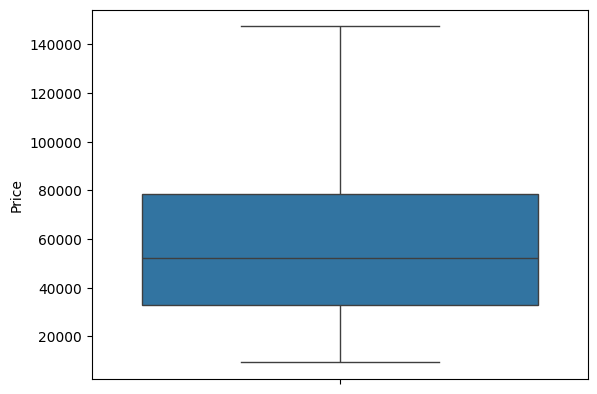

In [24]:
# here we can see that there is no outliers  
sns.boxplot(df['Price'])

In [25]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Feature Engineering And EDA ------>

In [26]:
# removing the GB and kg inside Ram and weight column -->
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [27]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [28]:
# df[df['Weight'] == '?'].drop(index=208)
# df[df['Weight'] == '?']

In [29]:
df = df.drop(index=208)

In [30]:
# converting Ram and weight columns to Int and float
df['Ram'] = df['Ram'].astype(int)
df['Weight'] = df['Weight'].astype('float32')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1302 non-null   object 
 1   TypeName          1302 non-null   object 
 2   Inches            1302 non-null   object 
 3   ScreenResolution  1302 non-null   object 
 4   Cpu               1302 non-null   object 
 5   Ram               1302 non-null   int32  
 6   Memory            1302 non-null   object 
 7   Gpu               1302 non-null   object 
 8   OpSys             1302 non-null   object 
 9   Weight            1302 non-null   float32
 10  Price             1302 non-null   float64
dtypes: float32(1), float64(1), int32(1), object(8)
memory usage: 111.9+ KB


In [32]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


##### Price Analysis

C:\Users\sudar\AppData\Local\Temp\ipykernel_43032\3412907018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

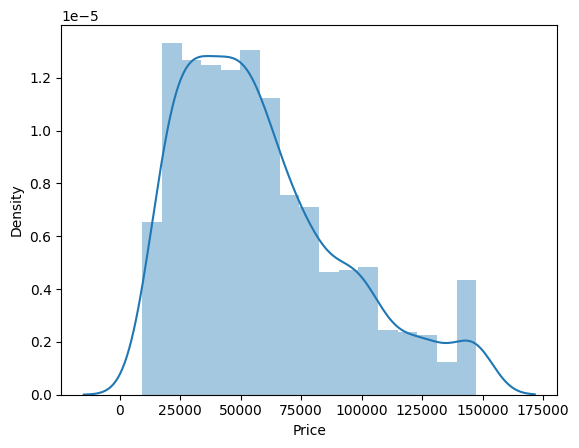

In [33]:
sns.distplot(df['Price'])
# here we can see that our price column is skewed --------->

##### Company Analysis

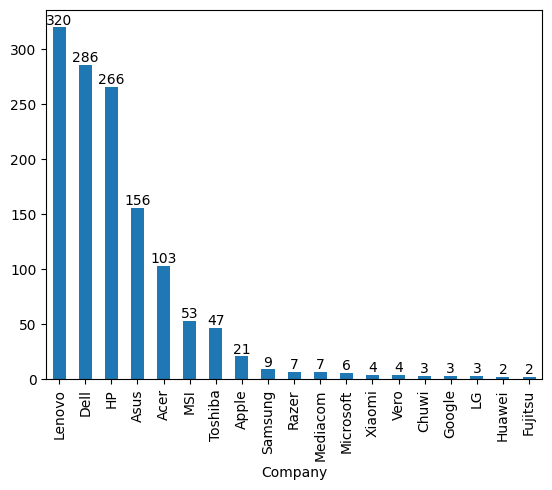

In [34]:
f =df['Company'].value_counts().plot(kind='bar')
# df.head()
for c in f.containers:
    f.bar_label(c)

here we can see that the Lenovo comapany laptops are highest around 300 above
and dell laptops around in the 280 
and HP laptops around 270

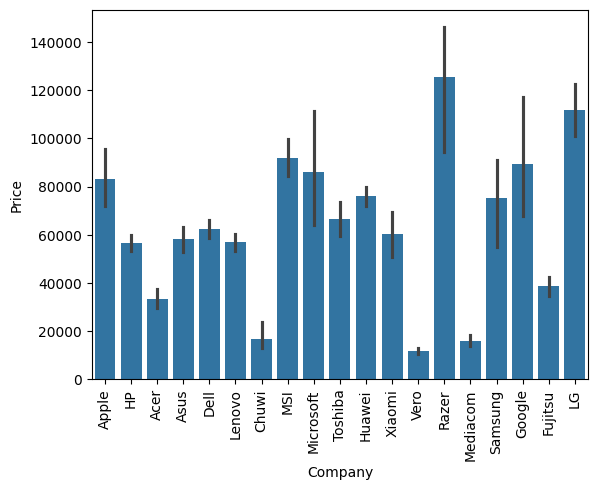

In [35]:
import matplotlib.pyplot as plt
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()


Typename column analysis

<Axes: xlabel='TypeName'>

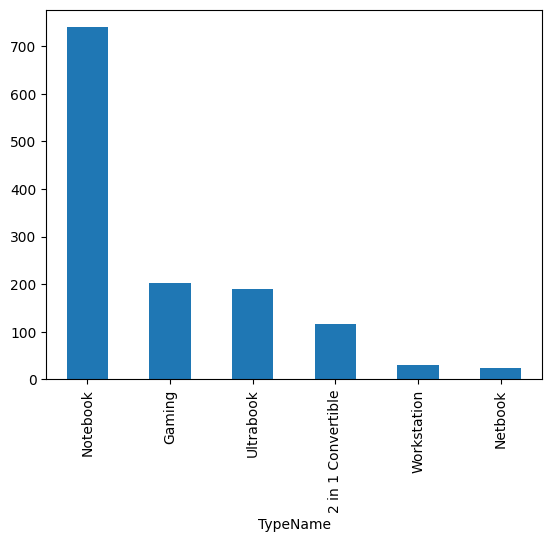

In [36]:
df['TypeName'].value_counts().plot(kind='bar')

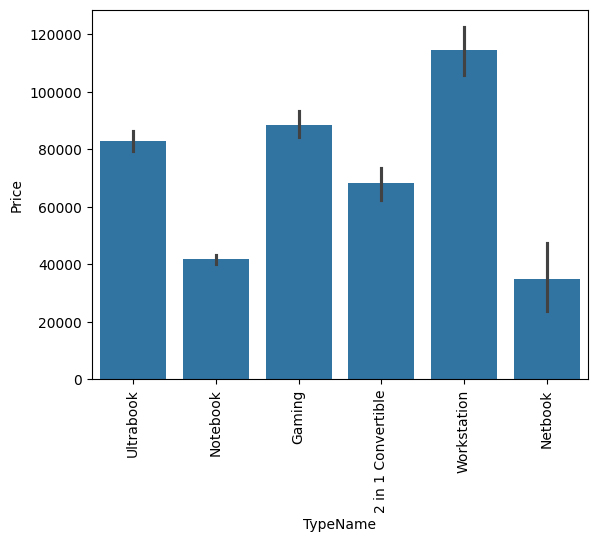

In [37]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()


In [38]:
# df[df['Inches']== '?']
df  = df.drop(index=476)

Inches column analysis

C:\Users\sudar\AppData\Local\Temp\ipykernel_43032\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

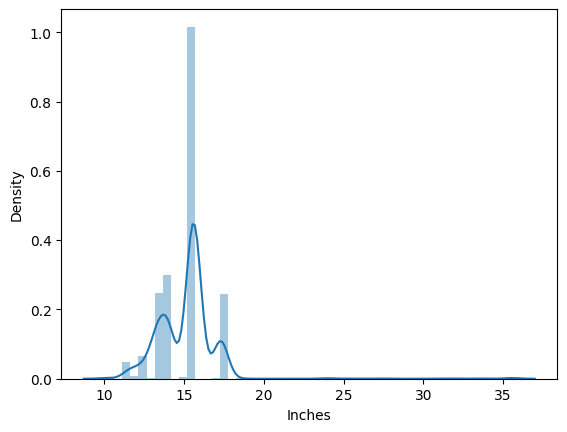

In [39]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

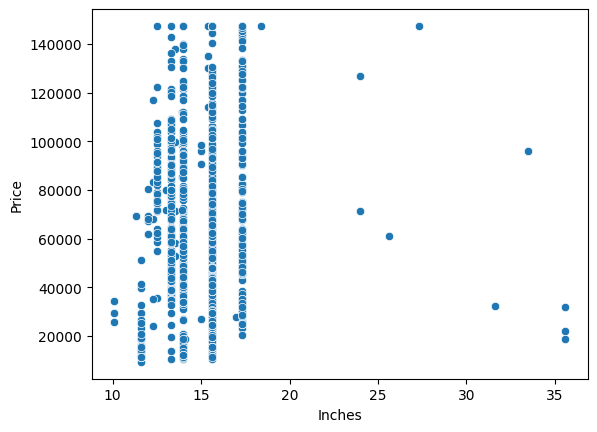

In [40]:
df['Inches'] = df['Inches'].astype(float)

sns.scatterplot(x=df['Inches'],y=df['Price'])
# plt.xticks(rotation='vertical')
# plt.show()


ScreenResolution Column Analysis

In [41]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                523
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [42]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [43]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<Axes: xlabel='Touchscreen'>

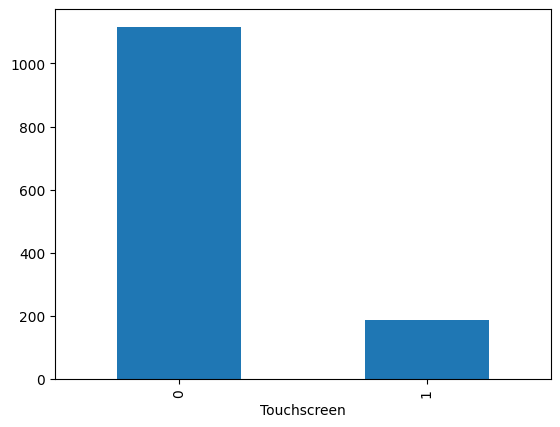

In [44]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

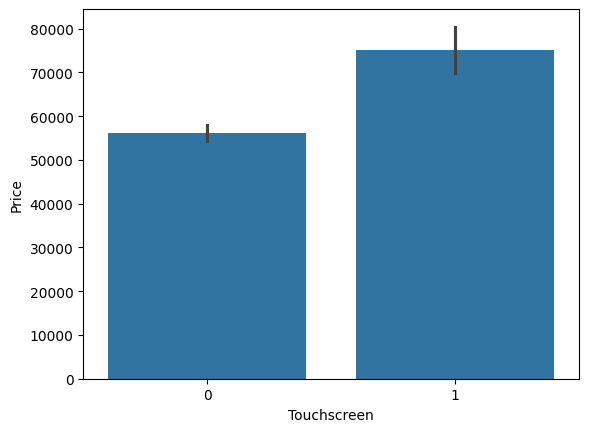

In [45]:
sns.barplot(x=df['Touchscreen'], y=df['Price'])

In [46]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [47]:
df['ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [48]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='ips'>

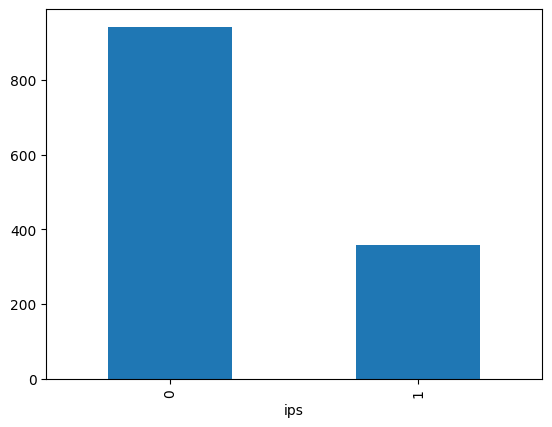

In [49]:
df['ips'].value_counts().plot(kind='bar')

<Axes: xlabel='ips', ylabel='Price'>

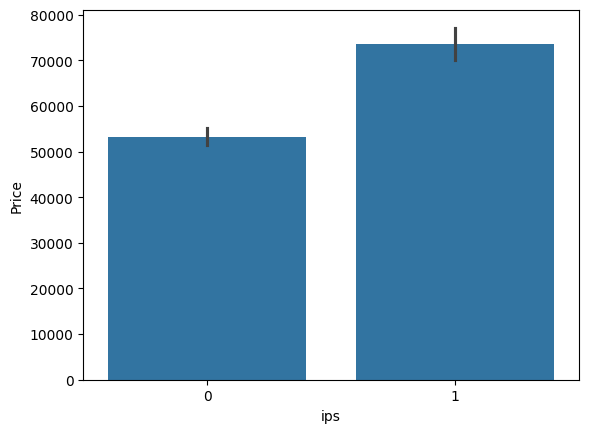

In [50]:
sns.barplot(x=df['ips'],y=df['Price'])

In [51]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [52]:
df['x_res'] =new[0]
df['y_res'] =new[1]

In [53]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [54]:
df['x_res'] = df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [55]:
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [56]:
df['x_res'] = df['x_res'].astype(int)
df['y_res'] = df['y_res'].astype(int)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1301 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1301 non-null   object 
 1   TypeName          1301 non-null   object 
 2   Inches            1301 non-null   float64
 3   ScreenResolution  1301 non-null   object 
 4   Cpu               1301 non-null   object 
 5   Ram               1301 non-null   int32  
 6   Memory            1301 non-null   object 
 7   Gpu               1301 non-null   object 
 8   OpSys             1301 non-null   object 
 9   Weight            1301 non-null   float32
 10  Price             1301 non-null   float64
 11  Touchscreen       1301 non-null   int64  
 12  ips               1301 non-null   int64  
 13  x_res             1301 non-null   int32  
 14  y_res             1301 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 142.3+ KB


In [58]:
df['ppi'] = (((df['x_res']**2) + (df['y_res']**2))**0.5/df['Inches']).astype('float')

In [59]:
df.drop(columns=['ScreenResolution','x_res','y_res','Inches'],inplace=True)

In [60]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


Cpu Column Analysis

In [61]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     213
Intel Core i7 7700HQ 2.8GHz    141
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [62]:
# df['Cpu'].str.split('x')[0:3]
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [63]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [64]:
def fetch_processor(text):
    if text == 'Intel Core i7' or 'Intel Core i5' or 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other intel Processor'
        else:
            return 'AMD Processor'

In [65]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)
# df['Cpu Name'].apply(fetch_processor)

In [66]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,Cpu Name,Cpu Brand
1142,HP,2 in 1 Convertible,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,86793.1200,1,0,165.632118,Intel Core i5,Intel Core i5
1005,HP,Notebook,Intel Core i5 6300U 2.4GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,58607.4672,0,0,111.935204,Intel Core i5,Intel Core i5
254,Acer,Notebook,Intel Core i3 7130U 2.7GHz,4,256GB SSD,Nvidia GeForce MX130,Windows 10,3.00,37402.5600,0,1,127.335675,Intel Core i3,Intel Core i3
217,HP,Notebook,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.63,54931.6800,0,0,157.350512,Intel Core i7,Intel Core i7
857,HP,2 in 1 Convertible,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,136343.5200,1,0,165.632118,Intel Core i7,Intel Core i7


<Axes: xlabel='Cpu Brand'>

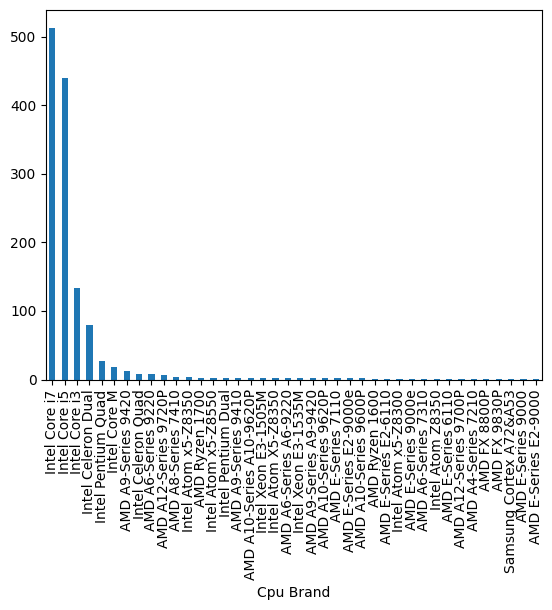

In [67]:
df['Cpu Brand'].value_counts().plot(kind='bar')

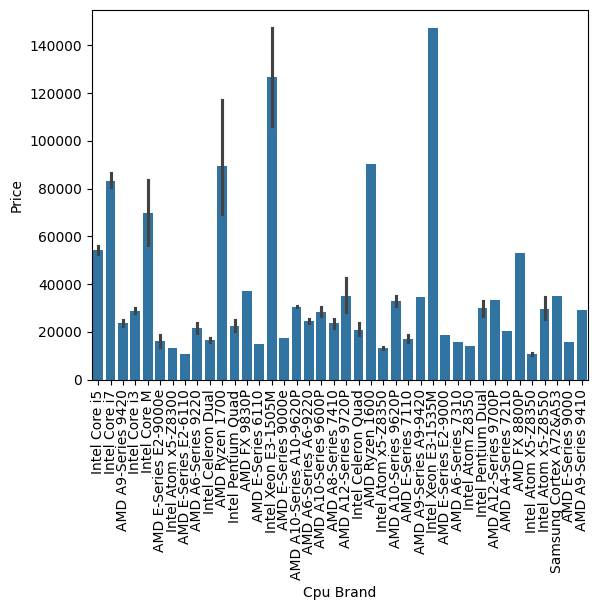

In [68]:
sns.barplot(x=df['Cpu Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [69]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,Cpu Name,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [70]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [71]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


Ram Column Analysis

<Axes: xlabel='Ram'>

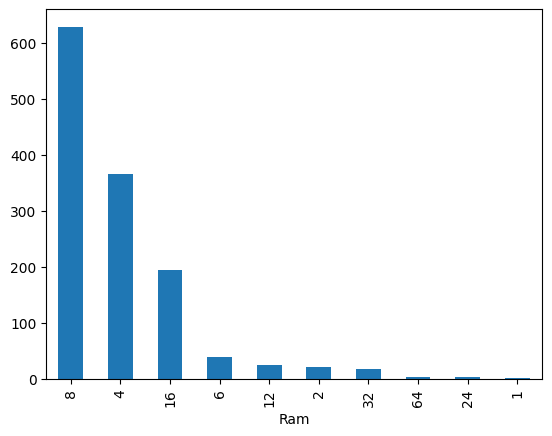

In [72]:
df['Ram'].value_counts().plot(kind='bar')

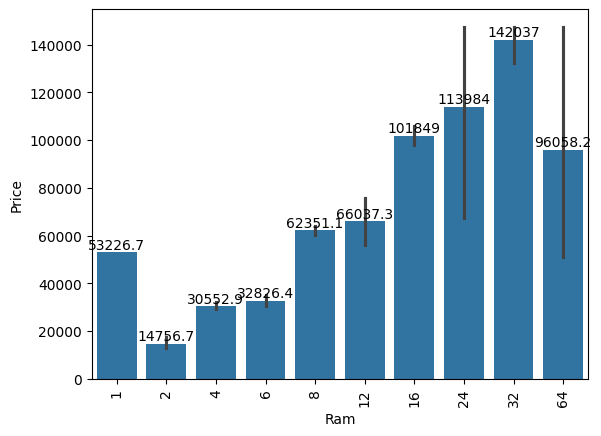

In [73]:
m = sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
for c in m.containers:
    m.bar_label(c)
plt.show()



In [74]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


Memory Column Analysis

In [75]:
df['Memory'].value_counts()
# df['Memory'].unique()

Memory
256GB SSD                        429
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [76]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# import re
# df['second'] = df['second'].str.replace(r'\D', '')
df['second'] = df['second'].str.replace('SSD', '')
df['second'] = df['second'].str.replace('HDD', '')
df['second'] = df['second'].str.replace('Hybrid', '')
#  numeric_part = storage_str.replace(' SSD', '')
# -

df['first'] = df['first'].str.replace('SSD', '')
df['first'] = df['first'].str.replace('HDD', '')
df['first'] = df['first'].str.replace('Hybrid', '')
df['first'] = df['first'].str.replace('Flash Storage', '')

df = df.drop(index=770)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)


df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)


# df.drop(columns=['first', 'second'],inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\sudar\AppData\Local\Temp\ipykernel_43032\747585822.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
C:\Users\sudar\AppData\Local\Temp\ipykernel_43032\747585822.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace = True)


In [77]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [78]:
df.drop(columns=['Memory'],inplace=True)

In [79]:
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128


In [80]:
# here we drop the hybrid and flash storage becuase that have less correlations
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)


In [81]:
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,ips,ppi,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0


Gpu Column Analysis

In [82]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      301
Intel HD Graphics 520      181
Intel UHD Graphics 620      65
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [83]:
# df.corr()['Price']

df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
# df['Gpu'].apply(lambda x:x.split()[0])

In [84]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     732
Nvidia    392
AMD       175
ARM         1
Name: count, dtype: int64

In [85]:
df = df[df['Gpu brand'] != 'ARM']

In [86]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     732
Nvidia    392
AMD       175
Name: count, dtype: int64

<Axes: xlabel='Gpu brand'>

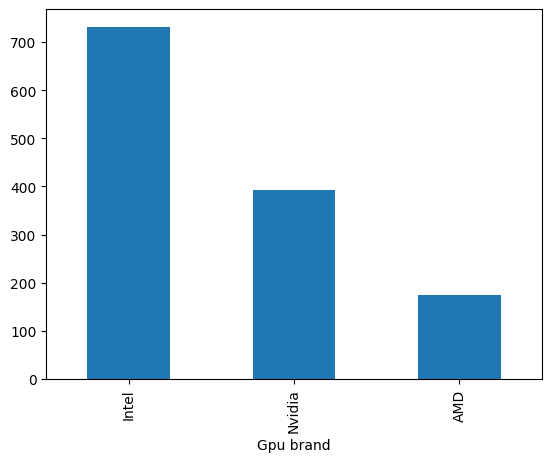

In [87]:
df['Gpu brand'].value_counts().plot(kind='bar')

<Axes: xlabel='Gpu brand', ylabel='Price'>

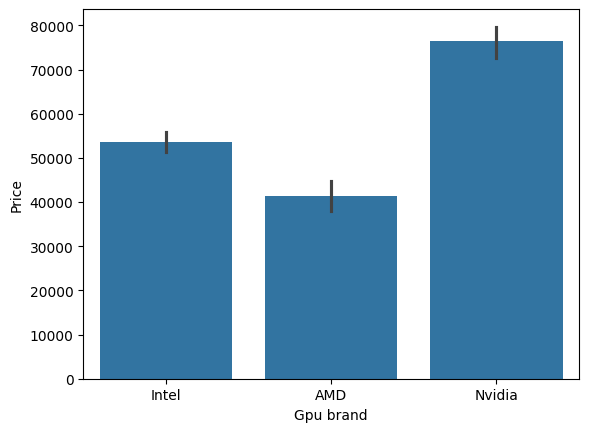

In [88]:
sns.barplot(x=df['Gpu brand'],y=df['Price'])

In [89]:
df.drop(columns=['Gpu'],inplace=True)

In [90]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Price', 'Touchscreen',
       'ips', 'ppi', 'Cpu Brand', 'HDD', 'SSD', 'Gpu brand'],
      dtype='object')

OpSys Column Analysis

In [91]:
df['OpSys'].value_counts()

OpSys
Windows 10      1074
No OS             63
Linux             61
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

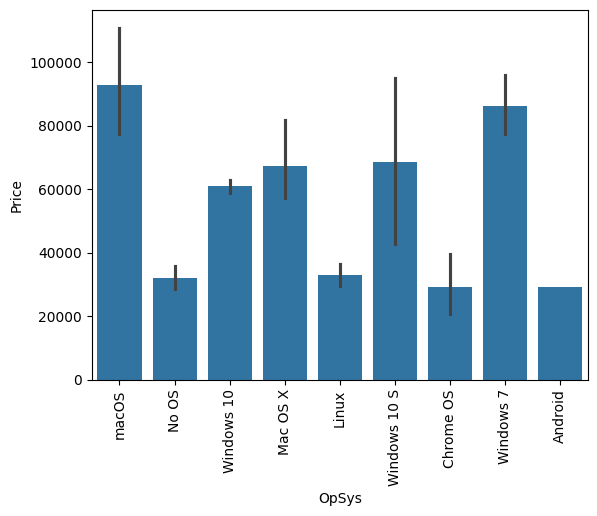

In [92]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [93]:
def Catogorical_os(input):
    if input == 'Windows 10' or input == 'Windows 7' or input == 'Windows 10S':
        return 'Windows'
    elif input == 'macOS' or input == 'Mac OS X' :
        return 'Mac'
    else:
        return 'Others/No Os/Linux/'

In [94]:
df['os'] = df['OpSys'].apply(Catogorical_os)

In [95]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,ips,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
490,Lenovo,Notebook,8,Windows 10,2.30,53918.8272,0,1,141.211998,Intel Core i5,0,256,Nvidia,Windows
281,Dell,Notebook,4,Linux,2.25,22803.8400,0,0,141.211998,Intel Core i3,1000,0,AMD,Others/No Os/Linux/
1120,Vero,Notebook,4,Windows 10,1.35,10442.8800,0,0,165.632118,Intel Atom X5-Z8350,0,0,Intel,Windows
1240,Lenovo,Notebook,6,Windows 10,2.20,31838.5296,0,0,141.211998,AMD A12-Series 9720P,0,256,AMD,Windows
836,Asus,Gaming,16,Windows 10,2.90,128884.3200,0,0,127.335675,Intel Core i7,1000,256,Nvidia,Windows


<Axes: xlabel='os', ylabel='Price'>

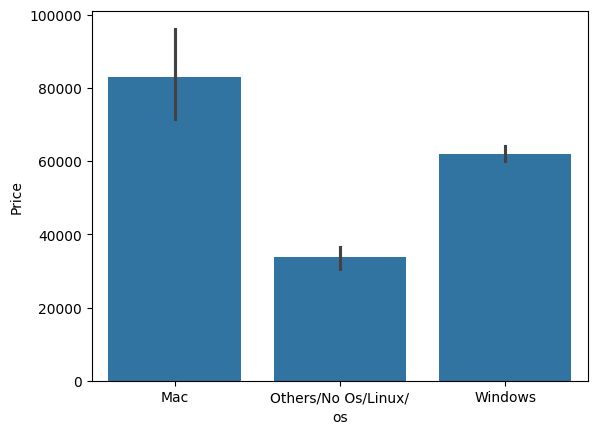

In [96]:
sns.barplot(x=df['os'],y=df['Price'])

In [97]:
df.drop(columns=['OpSys'],inplace=True)

Weight Column Analysis

C:\Users\sudar\AppData\Local\Temp\ipykernel_43032\3442460328.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

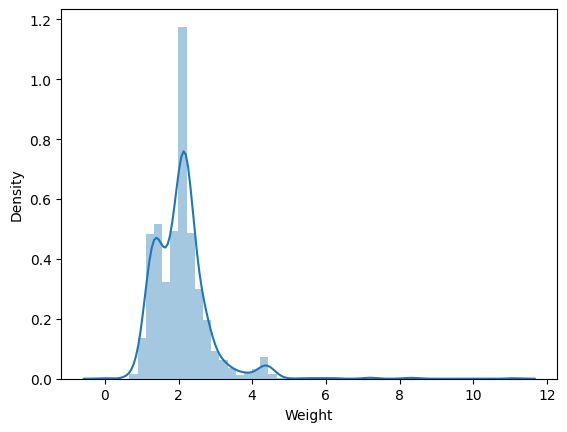

In [98]:
sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Price'>

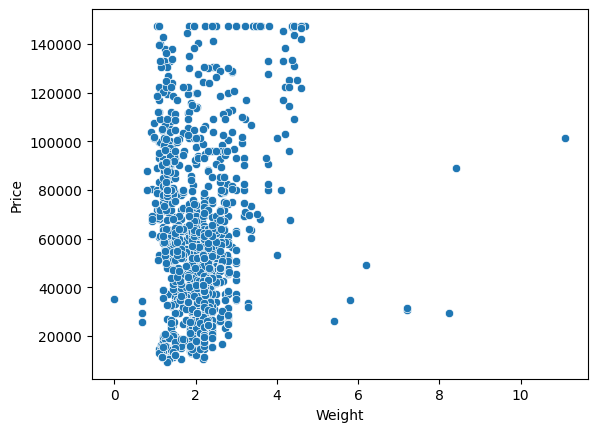

In [99]:
sns.scatterplot(x=df['Weight'],y=df['Price'])


##### Price columns is skewed but problem is it will disturb our LM algorithms 
##### So we have to convert into normal for that we use log ---->

C:\Users\sudar\AppData\Local\Temp\ipykernel_43032\4215048856.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

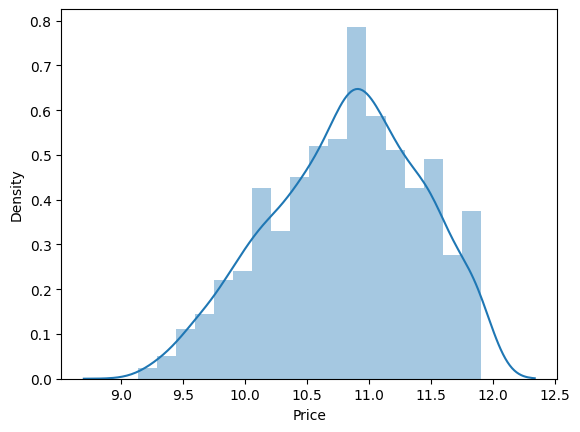

In [100]:
# sns.distplot(df['Price'])
sns.distplot(np.log(df['Price']))

In [101]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,ips,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No Os/Linux/
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [102]:
# ca = df.select_dtypes(include=object)
# ca.columns

# catogorical_columns  = ['Company', 'TypeName', 'Cpu Brand', 'Gpu brand', 'os']
# OneHotEncoder 

# Pipeline
# preprocessing = ColumnTransformer(transformers=[('cat',OneHotEncoder(handle_unknown='ignore'),catogorical_columns)],remainder='passthrough')
# model = Pipeline([('preprocessing',preprocessing),('Regressor',RandomForestRegressor())])

#### All of The Following Are done by Pipeline ----->  

Feature scalling

Feature Encoding

Machine Learning Algoritham

In [103]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble  import GradientBoostingRegressor

from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import Pipeline 

from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
# all fetures in X 
X = df.drop(columns=['Price'])
# Target Price column in y
y = df['Price']

In [106]:
# indices of categorical features here
X.head()
catogorical_columns  = [0 ,1 ,7 ,10 ,11]


In [107]:
# indices of Numerical features here
numerical_features = [i for i in range(X.shape[1]) if i not in catogorical_columns]

In [108]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('num', numerical_pipeline,numerical_features ),
    ('cat', categorical_pipeline, catogorical_columns)
])

# final pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [109]:
X.head(1)

,Company,TypeName,Ram,Weight,Touchscreen,ips,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac


In [110]:
y.head()

0     71378.6832
1     47895.5232
2     30636.0000
3    135195.3360
4     96095.8080
Name: Price, dtype: float64

Train Test Split ---->

In [111]:
# testing the model by Hold out cross validation technique --->
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Linear Regression ------->

In [112]:
# training the Model --->
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [2, 3, 4, 5, 6, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 7, 10, 11])])),
                ('regressor', LinearRegression())])

In [113]:
# Machine Predicted values ---->
y_pred = model.predict(x_test)

In [114]:
# actual values
y_test.head()

1235     25467.8400
580      20725.9200
1167     24935.0400
724      71847.0144
563     147428.0244
Name: Price, dtype: float64

In [115]:
r2_score(y_test,y_pred)*100

70.41304914028137

In [116]:
mean_absolute_error(y_test,y_pred)

12408.495151918414

In [117]:
mse = mean_squared_error(y_test,y_pred)
mse

294202455.0368495

In [118]:
rmse = np.sqrt(mse)
rmse

17152.330892238802

Random Forest Regressor ------>

In [119]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('num', numerical_pipeline,numerical_features ),
    ('cat', categorical_pipeline, catogorical_columns)
])

# final pipeline
model2 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [120]:
model2.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [2, 3, 4, 5, 6, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 7, 10, 11])])),
                ('regressor', RandomForestRegressor())])

In [121]:
y_pred2 = model2.predict(x_test)

In [122]:
r2_score(y_test,y_pred2)*100

82.6649372570499

In [123]:
mean_absolute_error(y_test,y_pred2)

8795.16950773165

In [124]:
mse = mean_squared_error(y_test,y_pred2)
mse

172373896.9038948

In [125]:
rmse = np.sqrt(mse)
rmse

13129.123996059097

Gradient Boosting Regressor ----->


In [126]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('num', numerical_pipeline,numerical_features ),
    ('cat', categorical_pipeline, catogorical_columns)
])

# final pipeline
model3 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

In [127]:
model3.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [2, 3, 4, 5, 6, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 7, 10, 11])])),
                ('regressor', GradientBoostingRegressor())])

In [128]:
y_pred3 = model3.predict(x_test)

In [129]:
r2_score(y_test,y_pred3)*100

79.09895325451068

In [130]:
mean_absolute_error(y_test,y_pred3)

10067.909718556166

In [131]:
mse = mean_squared_error(y_test,y_pred3)
mse

207832814.3551522

In [132]:
rmse = np.sqrt(mse)
rmse

14416.407817315387

## Hyperparameter Tuning:

HyperParameter Tunning for Random Forest Regressor Model ---->

In [133]:
dumies  = pd.get_dummies(df,columns=['Company', 'TypeName', 'Cpu Brand', 'Gpu brand', 'os'],drop_first=True).astype(int)
# ob.columns
dumies.head()
# df.head()

,Ram,Weight,Price,Touchscreen,ips,ppi,HDD,SSD,Company_Apple,Company_Asus,...,Cpu Brand_Intel Core i5,Cpu Brand_Intel Core i7,Cpu Brand_Intel Pentium Dual,Cpu Brand_Intel Pentium Quad,Cpu Brand_Intel Xeon E3-1505M,Cpu Brand_Intel Xeon E3-1535M,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No Os/Linux/,os_Windows
0,8,1,71378,0,1,226,0,128,1,0,...,1,0,0,0,0,0,1,0,0,0
1,8,1,47895,0,0,127,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,8,1,30636,0,0,141,0,256,0,0,...,1,0,0,0,0,0,1,0,1,0
3,16,1,135195,0,1,220,0,512,1,0,...,0,1,0,0,0,0,0,0,0,0
4,8,1,96095,0,1,226,0,256,1,0,...,1,0,0,0,0,0,1,0,0,0


In [134]:
X = dumies.drop(columns=['Price'])
y = dumies['Price']

In [135]:
# All 3 Models Hyperpyarameter tunning performed ---------------->
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=162)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)
gb_predictions = gb_regressor.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print("Gradient Boosting Mean Squared Error:", gb_mse)

# Linear Regression
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)
lr_predictions = lr_regressor.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
print("Linear Regression Mean Squared Error:", lr_mse)


Random Forest Mean Squared Error: 177078492.2229992
Gradient Boosting Mean Squared Error: 223721296.55880842
Linear Regression Mean Squared Error: 292607520.0782052


R2 Score of All Models -------->

In [136]:
from sklearn.metrics import r2_score

# Random Forest Regressor
rf_r2 = r2_score(y_test, rf_predictions)*100
print("Random Forest R² Score:", rf_r2)

# Gradient Boosting Regressor
gb_r2 = r2_score(y_test, gb_predictions)*100
print("Gradient Boosting R² Score:", gb_r2)

# Linear Regression
lr_r2 = r2_score(y_test, lr_predictions)
print("Linear Regression R² Score:", lr_r2)


Random Forest R² Score: 82.19186410942643
Gradient Boosting R² Score: 77.50116798082205
Linear Regression R² Score: 0.705735325914435


# Interpretability and Insights: 
Uncover insights into which features play a pivotal role in pricing decisions.

### Company Column Has Highest Impact on pricing decisions :
##### Razer.co has highest price starts from 120000
##### LG.co has starts price from 100000 
##### Google.co has starts from proce 85000 
##### Apple.co 21 products but it starts price from 80000  
##### Remaining are between 20000 to 60000 

### Typename column has impact on price :
##### workstation has takes first place in the market around 115000
##### Gaming Laptops are second highest saled lapstops price are 80000
##### Ultrabool has price 20000 to 80000
##### 2 in 1 convertible tabs are 70000
##### Notebooks around below 40000
##### Netbook are lowest price 35000

### Touchscreen Pricing Decisions :
##### Laptops of Without Touchscreen Prices Starts from above 10000 and ends 55000
##### Laptops With Touchscreen starts Price from 10000 and ends within 85000 

### IPS Panel Pricing Decisions  :
##### Laptops of Without IPS Panel Prices Starts from above 10000 and ends 55000
##### Laptops With  IPS Panel starts Price from 10000 and ends within 75000 

### CPU Brand Has Highest Impact on Pricing Decisions :
##### Intel Core i 7 has highest Price 
##### Inetel Core i 5 has Second Highest price
##### Intel Core i 3 has Lowest Price

### RAM columns Prices :
##### 32 GB rama has Highest Price 142037
##### 24 GB ram has 113984
##### 16 GB ram has 101879
##### 12 Gb Ram Has 66087.3
##### Ramining Rams around 60000 to 20000

### Memory Price:
##### SSD has Highest Price
##### HDD has second highest Price
##### Hybrid has Third Lowest Price
##### Flash Storage has Fourth Lowest Price

### GPU Brand Column Pricing Decision :
##### Nvidia Graphic has highest Pricing Impact of 75000
##### Intel Graphic has second highest Pricing Impact of 55000
##### AMD Graphic has Third highest Pricing Impact of 40000


### Operating Systems Pricing Strategy :
##### Mac OS has Highest Price 80000
##### Windows OS has second Highest Price 65000
##### Others OS has Price between 20000 to 37000 


# Expected Outcomes:
A reliable machine learning model capable of predicting laptop prices with high accuracy.

Insights into the factors influencing laptop prices, empowering SmartTech Co. in market positioning and strategy.

### From the machine learning model:
##### the best result was from the Random forest Regressor of from train test split 20% testing and remaing for trainig
##### from random forest model was 81 % of Accuracy
##### After Hyperparameter Tunning of Random Forest Regressor was 82 % of Accuracy  
##### and remaining of Linear Regression  71 % of accuracy  
##### from Gradient boosting regressor was 79 % of accuracy

# Questions to Explore:


### 1 Which features have the most significant impact on laptop prices?

#### Following are the features have most significanlty impact on prices --->
Company, Ram, Touchscreen, ips, ppi, Cpu Brand, HDD, SSD, Gpu brand, os

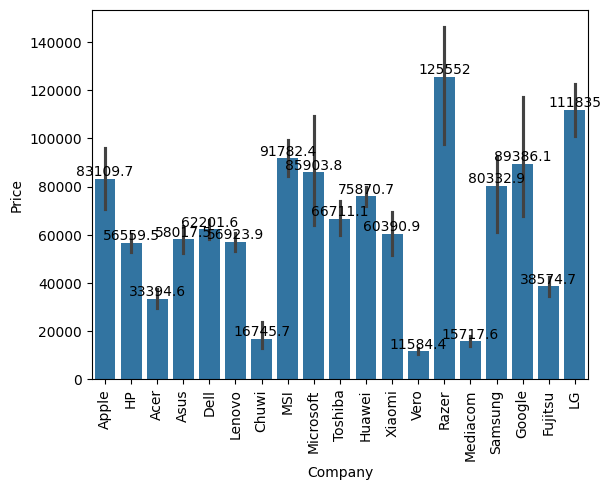

In [137]:
ram_price = sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')

for cols in ram_price.containers:
    ram_price.bar_label(cols)

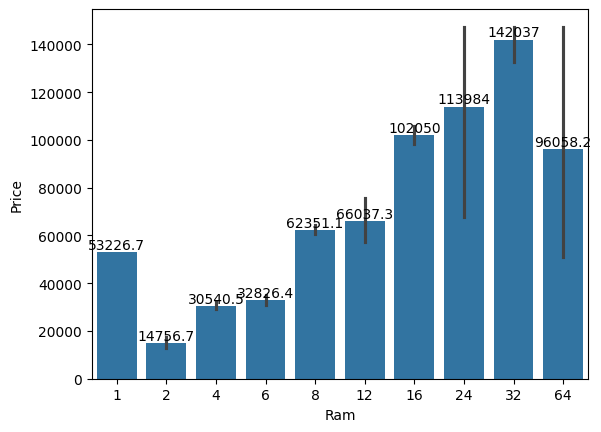

In [138]:
ram_price = sns.barplot(x=df['Ram'],y=df['Price'])

for cols in ram_price.containers:
    ram_price.bar_label(cols)

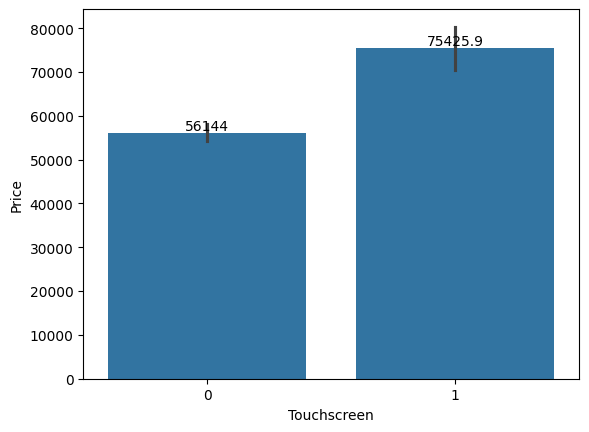

In [139]:
ram_price = sns.barplot(x=df['Touchscreen'],y=df['Price'])

for cols in ram_price.containers:
    ram_price.bar_label(cols)

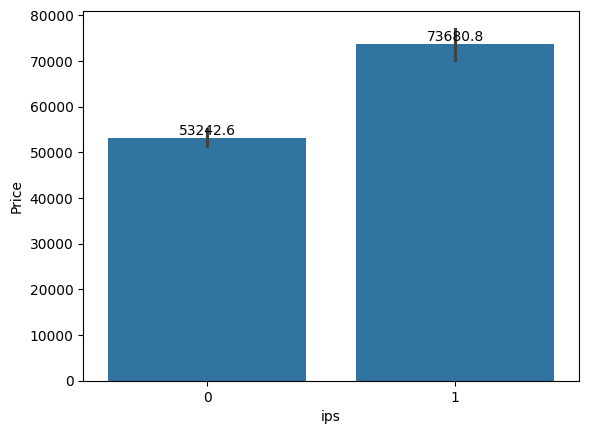

In [140]:
ram_price = sns.barplot(x=df['ips'],y=df['Price'])

for cols in ram_price.containers:
    ram_price.bar_label(cols)

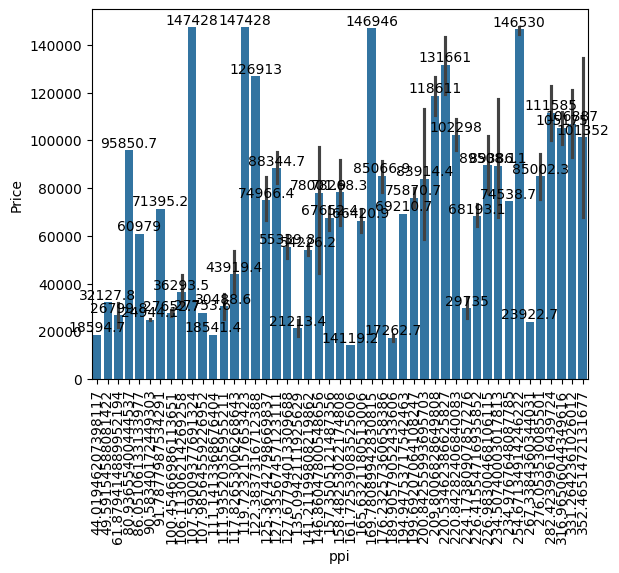

In [141]:
# screel resulaution pixel per index 
ram_price = sns.barplot(x=df['ppi'],y=df['Price'])
plt.xticks(rotation='vertical')
for cols in ram_price.containers:
    ram_price.bar_label(cols)

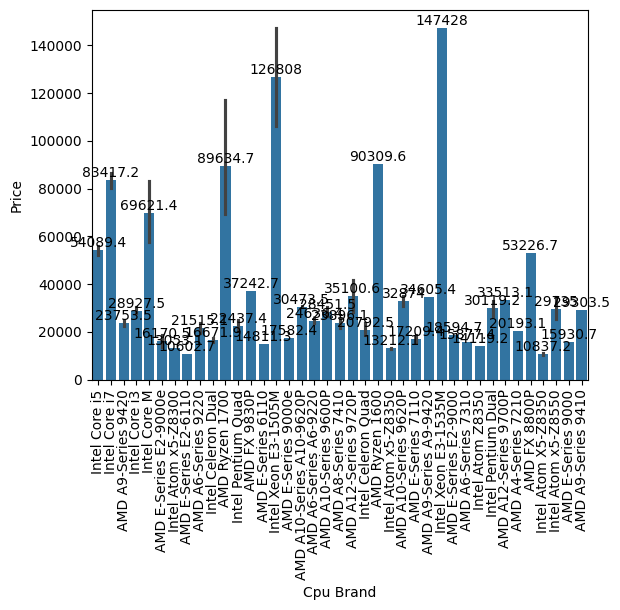

In [142]:
ram_price = sns.barplot(x=df['Cpu Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
for cols in ram_price.containers:
    ram_price.bar_label(cols)

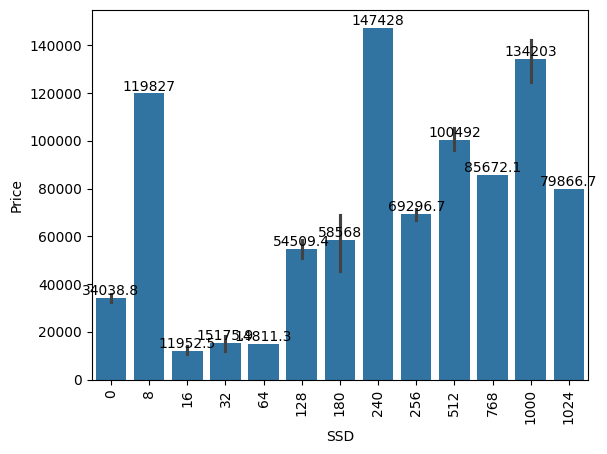

In [143]:
ram_price = sns.barplot(x=df['SSD'],y=df['Price'])
plt.xticks(rotation='vertical')
for cols in ram_price.containers:
    ram_price.bar_label(cols)

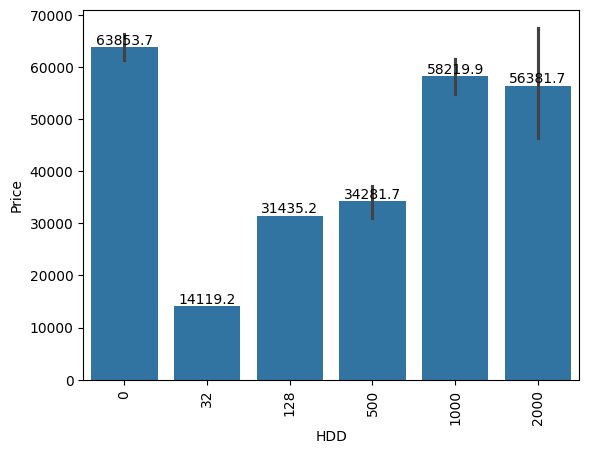

In [144]:
ram_price = sns.barplot(x=df['HDD'],y=df['Price'])
plt.xticks(rotation='vertical')
for cols in ram_price.containers:
    ram_price.bar_label(cols)

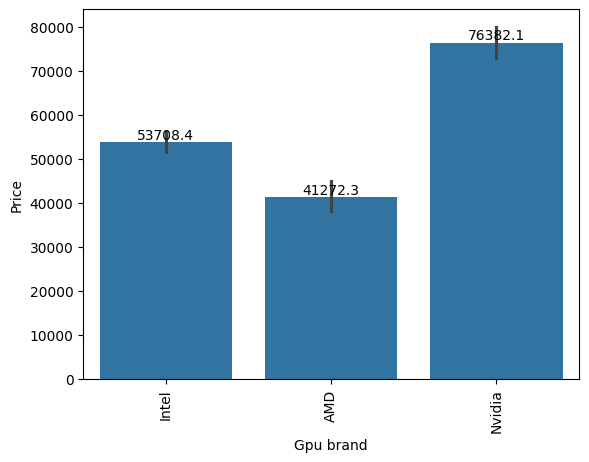

In [145]:
ram_price = sns.barplot(x=df['Gpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
for cols in ram_price.containers:
    ram_price.bar_label(cols)

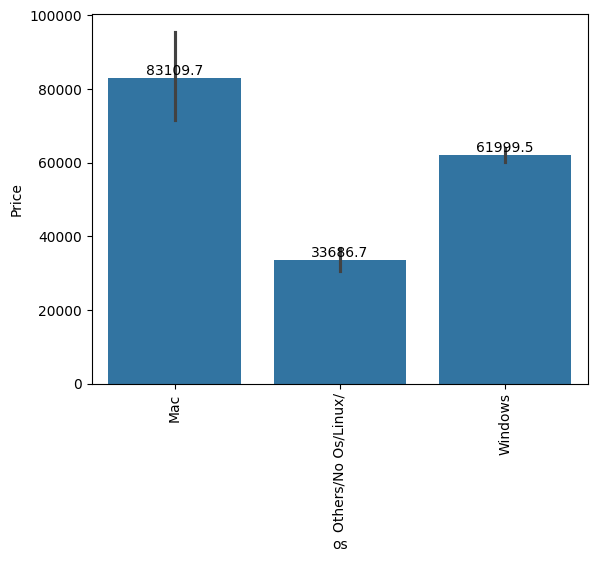

In [146]:
ram_price = sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
for cols in ram_price.containers:
    ram_price.bar_label(cols)

#### 2 Can the model accurately predict the prices of laptops from lesser-known brands?
Yes model can accurately predict the prices of laptops from lesser-known brands

#### 3 Does the brand of the laptop significantly influence its price?
yes brand of the laptop significantly influence its price 

#### 4 How well does the model perform on laptops with high-end specifications compared to budget laptops
model performs for high-end specifications compared to budget laptops is very high 

#### 5 What are the limitations and challenges in predicting laptop prices accurately?
### Limitions :
##### 1 Feature Variety and Rapid Technological Advancements
##### 2 Brand and Market Positioning
##### 3 Consumer Preferences and Trends
##### 4 Data Availability and Quality
### Challenges :
##### 1 Develop Robust Models
##### 2 Account for External Factors
##### 2 Leverage Expert Insights

### 6 How does the model perform when predicting the prices of newly released laptops not present in the training dataset?
#### Strategies to Improve Prediction for New Releases:
1 Incorporate Up-to-Date Data
2 Feature Engineering:
3 Ensemble Models
4 Regular Model Retraining

#### Example Approach :
 newly released laptops not present in the training dataset


In [154]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data = df 
features = ['Cpu Brand', 'Gpu brand', 'Ram', 'SSD', 'Company', 'ppi']
X = data[features]
y = data['Price']

# Encode categorical variables
X = pd.get_dummies(X, columns=['Cpu Brand', 'Gpu brand', 'Company', 'ppi'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

# Predicting prices for new releases (example)
new_laptops = pd.DataFrame({
    'Cpu Brand': ['latest-gen CPU'],
    'Gpu brand': ['new-gen GPU'],
    'Ram': [16],
    'SSD': [512],
    'Company': ['BrandX'],
    'ppi': ['15.6" FHD']
})
new_laptops = pd.get_dummies(new_laptops, columns=['Cpu Brand', 'Gpu brand', 'Company', 'ppi'])

# Align the new data with training data columns
new_laptops = new_laptops.reindex(columns=X_train.columns, fill_value=0)

# Price prediction
new_prices = model.predict(new_laptops)
print('Predicted Prices for New Laptops:', new_prices)

r2_score(y_test,y_pred)*100

Mean Absolute Error: 10660.975864620887
Predicted Prices for New Laptops: [120089.241253]


72.82167829788435

## Thank You